In [1]:
import MDAnalysis

#traj1=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_1.dcd')
#traj2=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_2.dcd')
#traj3=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_3.dcd')
#traj4=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_4.dcd')
#traj5=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_5.dcd')
#traj6=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_6.dcd')
#traj7=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_7.dcd')
#traj8=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_8.dcd')
#traj9=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_9.dcd')
#traj10=MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','../dcd/complexwfe_M140I_10.dcd')
traj = MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop', ['../dcd/complexwfe_M140I_1.dcd','../dcd/complexwfe_M140I_2.dcd','../dcd/complexwfe_M140I_3.dcd','../dcd/complexwfe_M140I_4.dcd','../dcd/complexwfe_M140I_5.dcd','../dcd/complexwfe_M140I_6.dcd','../dcd/complexwfe_M140I_7.dcd','../dcd/complexwfe_M140I_8.dcd','../dcd/complexwfe_M140I_9.dcd','../dcd/complexwfe_M140I_10.dcd'])
wt_traj = MDAnalysis.Universe('/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe.prmtop',['/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_1.dcd','/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_2.dcd','/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_3.dcd','/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_4.dcd','/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_5.dcd','/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_6.dcd','/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_7.dcd','/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_8.dcd','/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_9.dcd','/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe_10.dcd'])

In [2]:
traj.trajectory

<ChainReader containing complexwfe_M140I_1.dcd and 9 more with 10000 frames of 265277 atoms>

In [3]:
traj.trajectory.n_frames

10000

In [4]:
from MDAnalysis.analysis.rms import rmsd #pull in rmsd function
prot = traj.select_atoms("protein") #only care about protein, not water/ions
refcoord = prot.positions #save initial coordinates
rmsds = [rmsd(refcoord,prot.positions) for ts in traj.trajectory]  #coordinates implicitly update as you iterat

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

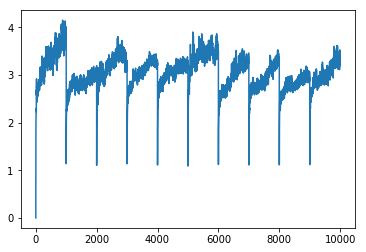

In [6]:
plt.plot(rmsds)

In [7]:
%%time
from MDAnalysis.analysis.align import AlignTraj
#align to loop

align = AlignTraj(traj, traj, select='backbone',filename='aligned.dcd')
wt_align = AlignTraj(wt_traj, wt_traj, select='backbone',filename='wt_aligned.dcd')
align.run()
wt_align.run()

CPU times: user 58min 50s, sys: 1h 31min 6s, total: 2h 29min 57s
Wall time: 22min 12s


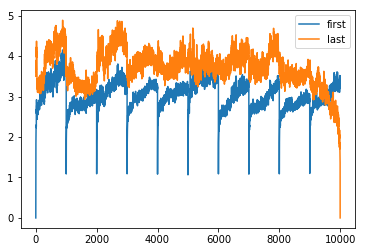

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

traj = MDAnalysis.Universe('../../sim/complexwfe_M140I.prmtop','aligned.dcd')
wt_traj = MDAnalysis.Universe('/net/pulsar/home/koes/lnm48/frataxin/wt_fe/complexwfe.prmtop','wt_aligned.dcd')
prot = traj.select_atoms("protein") #only care about protein, not water/ions
refcoord = prot.positions #save initial coordinates
rmsds = [rmsd(refcoord,prot.positions) for ts in traj.trajectory] 
traj.trajectory[-1] #set to last frame
lastcoord = prot.positions
lastrmsds = [rmsd(lastcoord,prot.positions) for ts in traj.trajectory]

plt.plot(rmsds,label='first')
plt.plot(lastrmsds,label='last')
plt.legend();

In [9]:
#loading all the coordinates into memory takes about 1GB
coords = [prot.positions for ts in traj.trajectory]

In [10]:
from MDAnalysis.analysis import pca
pc = pca.PCA(wt_traj, select='name CA').run()
pc.transform(traj.select_atoms('name CA'))

array([[ 8.88158327, -6.98308401, -3.61399197, ...,  0.84968063,
         0.11606032,  0.44368589],
       [18.98728577,  0.16839806, -1.18776505, ...,  0.77586911,
         0.22804543,  0.31174702],
       [10.57205393, -6.03873208, -0.74105908, ...,  0.82312322,
         0.15166777,  0.43150059],
       ...,
       [22.47591497, 35.987157  , 14.32051977, ...,  0.76065784,
         0.13889524,  0.35515573],
       [22.61862303, 35.63676134, 15.78249155, ...,  0.71592361,
         0.10919065,  0.46648778],
       [21.55803784, 45.71202949, 15.42201855, ...,  0.71082172,
         0.15055115,  0.37627772]])

In [11]:
pc.transform(traj.select_atoms('name CA'))

array([[ 8.88158327, -6.98308401, -3.61399197, ...,  0.84968063,
         0.11606032,  0.44368589],
       [18.98728577,  0.16839806, -1.18776505, ...,  0.77586911,
         0.22804543,  0.31174702],
       [10.57205393, -6.03873208, -0.74105908, ...,  0.82312322,
         0.15166777,  0.43150059],
       ...,
       [22.47591497, 35.987157  , 14.32051977, ...,  0.76065784,
         0.13889524,  0.35515573],
       [22.61862303, 35.63676134, 15.78249155, ...,  0.71592361,
         0.10919065,  0.46648778],
       [21.55803784, 45.71202949, 15.42201855, ...,  0.71082172,
         0.15055115,  0.37627772]])

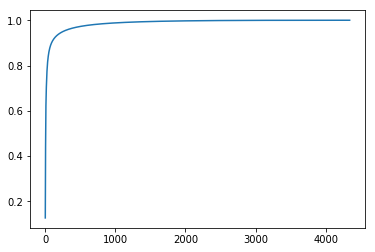

In [12]:
plt.plot(pc.cumulated_variance)

In [13]:
backbone = traj.select_atoms('name CA')
backbone

<AtomGroup with 1448 atoms>

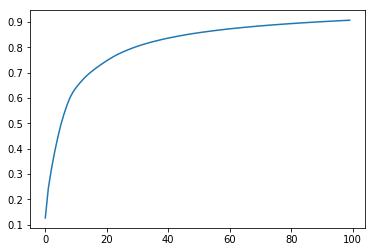

In [14]:
plt.plot(pc.cumulated_variance[:100])

In [15]:
transformed = pc.transform(backbone, n_components=10)

In [16]:
import pandas as pd
df = pd.DataFrame(transformed,
                  columns=['PC{}'.format(i+1) for i in range(10)])
df['sim'] = df.index//1000
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sim
0,8.881583,-6.983084,-3.613992,6.099014,3.687636,-4.215396,-0.874295,-0.453150,-2.523156,-1.455275,0
1,18.987286,0.168398,-1.187765,6.890625,0.166235,-7.821369,2.486311,-3.785847,-2.089525,0.036195,0
2,10.572054,-6.038732,-0.741059,4.420944,0.274060,-7.387056,-3.298412,-0.759641,1.500249,-2.565319,0
3,-3.856493,-7.546683,0.810364,-5.221057,1.125972,-14.458341,-6.703114,2.480169,1.507602,-5.058369,0
4,2.366470,-22.593532,-0.908112,2.399835,-3.680615,-10.455081,-0.022378,-4.077648,2.473698,-5.284117,0
5,0.556739,-18.152163,-5.467534,-2.142264,-4.935324,-7.634568,3.231962,-3.094165,0.427748,-6.506635,0
6,-0.983483,-20.314108,-1.414687,5.190490,-1.557093,-10.683448,3.220061,-1.725212,-2.344399,-2.480411,0
7,0.622433,-19.995314,-3.863095,-2.560448,-4.619408,-8.994758,1.672036,-0.993235,-1.026298,-4.151051,0
8,-5.768640,-23.235813,-4.708354,-2.519827,0.366170,-11.118123,5.714016,2.032505,0.421301,-8.960541,0
9,-4.811644,-13.538671,-2.740127,-2.703759,1.920194,-10.602796,3.116635,2.800931,0.618671,-9.378154,0


In [1]:
import seaborn as sns
g = sns.pairplot(df,vars=('PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'),hue='sim')

NameError: name 'df' is not defined